<a href="https://colab.research.google.com/github/zakzakzak/Image-and-Video-processing/blob/master/deep1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# implementasi CNN tensorflow dengan data MNIST (grayscale)
import tensorflow as tf

In [18]:
# pengambilan data
mnist = tf.keras.datasets.mnist # 28 x 28
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

# normalisasi
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# reshape dari 28,28 jadi 28,28,1 karena conv2D meminta input 3 dimensi
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# buat model
model = tf.keras.models.Sequential()

# layer konvolusi
model.add(tf.keras.layers.Conv2D(64, (3,3), input_shape = x_train.shape[1:] ))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

# model.add(tf.keras.layers.Conv2D(64, (3,3)))
# model.add(tf.keras.layers.Activation("relu"))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

# hasil gambar maxpooling dijadikan 1 dimensi dengan flatten
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam' ,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1902 - accuracy: 0.9438
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0783 - accuracy: 0.9767
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0603 - accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0488 - accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0399 - accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0323 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0272 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0235 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0192 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 43s 23m

In [19]:
import matplotlib.pyplot as plt

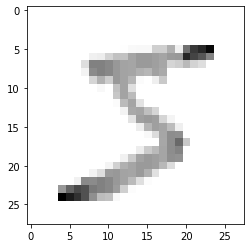

In [22]:
# visualisasi salah satu dataset
plt.imshow(x_train[0,:,:,0], cmap = plt.cm.binary)